# 逻辑回归（二分类）
## 1. 二分类逻辑回归模型
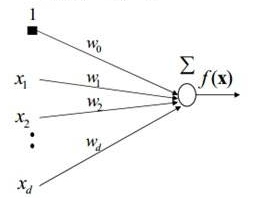
## 2. 逻辑回归的损失函数
$$ J(W)=\frac{1}{m}\sum_{i=1}^m[-y^{(i)}log(h_W(x^{(i)}))-(1-y^{(i)})log(1-h_W(x^{(i)}))] $$
## 3. 损失函数求导
$$ \frac{∂J(W)}{∂W_j}=\frac{1}{m}\sum_{i=1}^m(h_W(x^{(i)})-y^{(i)})x^{(i)}_j $$
## 4. 梯度上升
$$ W_i=W_i+lr*\frac{∂J(W)}{∂W_i}$$

In [1]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#读取数据
def loadDataSet():
    data = pd.read_csv('../dataset/1.pima.csv').values
    X = data[:,:-1]
    y = data[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test

#定义sigmoid函数
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

#输入数据特征与数据的类别标签
#返回最佳回归系数(weights)
def gradAscent(dataMatIn, classLabels, iter_num=10):
    #转换为numpy型
    dataMatrix = mat(dataMatIn) 
    # 转化为矩阵[[0,1,0,1,0,1.....]]，并转制[[0],[1],[0].....] 
    # transpose() 行列转置函数
    # 将行向量转化为列向量   =>  矩阵的转置
    labelMat = mat(classLabels).transpose()
    # m->数据量，样本数 n->特征数
    m,n = shape(dataMatrix)
    lr = 0.0001 #学习率
    #初始化权值向量，每个维度均为1.0
    weights = ones((n,1))
    
    for k in range(iter_num):
        #求当前sigmoid函数的值
        h = sigmoid(dataMatrix * weights)
        error = labelMat - h
        weights = weights + lr*dataMatrix.transpose() * error
        
        y_pro, y_pre = predict(dataMatrix,weights)
        acc_rate = accuracy_score(labelMat, y_pre)
        error_rate = abs(sum(error)/float(m))
        print("the error rate of "+str(k+1)+"th iteration is : "+str(error_rate))
        
    return array(weights)

# 预测
def predict(dataMatIn,weights):
    dataMatrix = mat(dataMatIn)
    y_pro = sigmoid((dataMatrix*weights).sum(axis=1))
    y_pre = where(y_pro < 0.5,0,1)
    return y_pro, y_pre

In [3]:
X_train, X_test, y_train, y_test = loadDataSet()
weights = gradAscent(X_train,y_train,10)
y_pro, y_pre = predict(X_test,weights)
my_acc_rate = accuracy_score(y_test, y_pre)
print("my_acc_rate : " + str(my_acc_rate))
# 调用API的逻辑回归
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test,y_test)

the error rate of 1th iteration is : 0.6459143968871596
the error rate of 2th iteration is : 0.3540856031128405
the error rate of 3th iteration is : 0.6459143848877078
the error rate of 4th iteration is : 0.3540856031128405
the error rate of 5th iteration is : 0.3540854866001018
the error rate of 6th iteration is : 0.6459143968871596
the error rate of 7th iteration is : 0.3540856031128405
the error rate of 8th iteration is : 0.6459143911945857
the error rate of 9th iteration is : 0.3540856031128405
the error rate of 10th iteration is : 0.0586050844311771
my_acc_rate : 0.6732283464566929


G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
G:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7677165354330708